### Reading and Understanding the Dataset

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')


In [4]:
#load dataset
df_main = pd.read_csv(r'C:\Users\hp\Desktop\Used_Car_Price_Prediction\used_cars_data.csv')

In [6]:
df_main.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [7]:
df_main.drop(columns=['S.No.'], inplace=True)

In [8]:
df_main.shape

(7253, 13)

In [10]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [11]:
#numerical stats
df_main.describe()

,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2013.365366,5.869906e+04,5.279722,9.479468
std,3.254421,8.442772e+04,0.811660,11.187917
min,1996.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.341600e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [12]:
#missing values
df_main.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

### Data Preprocessing

In [13]:
df_main['Age'] = 2025 - df_main['Year']
df_main.drop('Year',axis=1,inplace = True)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Owner_Type         7253 non-null   object 
 6   Mileage            7251 non-null   object 
 7   Engine             7207 non-null   object 
 8   Power              7207 non-null   object 
 9   Seats              7200 non-null   float64
 10  New_Price          1006 non-null   object 
 11  Price              6019 non-null   float64
 12  Age                7253 non-null   int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [14]:
df_main.rename(columns = {
    'Mileage': 'Mileage(kmpl)',
    'Engine': 'Engine(cc)',
    'Power': 'Power(bhp)',
    'Price': 'Selling_Price'  # Assuming Price is the selling price of the vehicle
}, inplace=True)


In [15]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Owner_Type         7253 non-null   object 
 6   Mileage(kmpl)      7251 non-null   object 
 7   Engine(cc)         7207 non-null   object 
 8   Power(bhp)         7207 non-null   object 
 9   Seats              7200 non-null   float64
 10  New_Price          1006 non-null   object 
 11  Selling_Price      6019 non-null   float64
 12  Age                7253 non-null   int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [16]:
df_main.drop(columns=['New_Price'], inplace=True)


In [17]:
df_main.shape

(7253, 12)

#Handling missing values

In [21]:
df_main['Seats'].fillna(df_main['Seats'].mode()[0], inplace=True)

df_main['Mileage(kmpl)'] = df_main['Mileage(kmpl)'].astype(str).str.extract(r'(\d+\.\d+)').astype(float)
df_main['Mileage(kmpl)'].fillna(df_main['Mileage(kmpl)'].median(), inplace=True)

df_main['Engine(cc)'] = df_main['Engine(cc)'].astype(str).str.extract(r'(\d+)').astype(float)
df_main['Engine(cc)'].fillna(df_main['Engine(cc)'].median(), inplace=True)

df_main['Power(bhp)'] = df_main['Power(bhp)'].astype(str).str.extract(r'(\d+\.\d+)').astype(float)
df_main['Power(bhp)'].fillna(df_main['Power(bhp)'].median(), inplace=True)

In [140]:
df_main.dropna(subset=['Selling_Price'], inplace=True)

In [23]:
df_main.shape

(7253, 12)

In [25]:
df_main['Selling_Price'].isnull().sum()

np.int64(1234)

In [22]:
df_main['Name'].nunique()  # Count unique names
df_main['Name'].value_counts().head(10)  # Top 10 most frequent names

Name
Mahindra XUV500 W8 2WD        55
Maruti Swift VDI              49
Maruti Swift Dzire VDI        42
Honda City 1.5 S MT           39
Maruti Swift VDI BSIV         37
Maruti Ritz VDi               35
Toyota Fortuner 3.0 Diesel    35
Honda City 1.5 V MT           32
Hyundai Grand i10 Sportz      32
Honda Amaze S i-Dtech         32
Name: count, dtype: int64

In [145]:
df_main['Brand'] = df_main['Name'].apply(lambda x: x.split()[0])  # Extract first word (Brand)
df_main.drop(columns=['Name'], inplace=True)  # Drop full name column

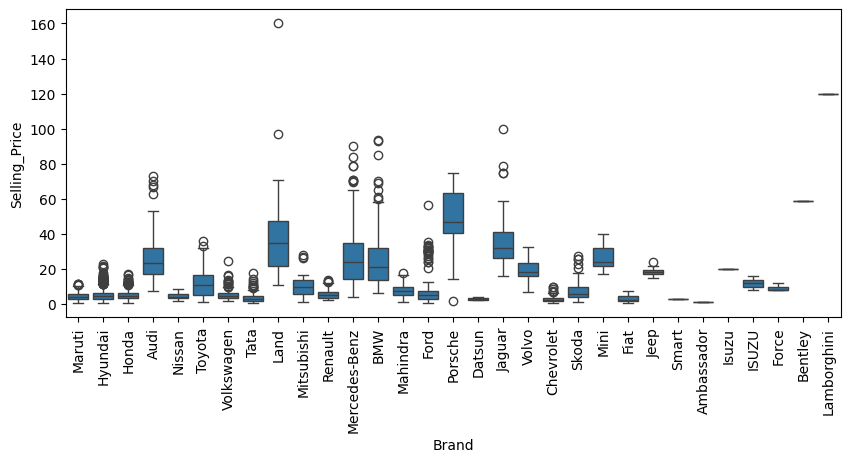

In [146]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='Brand', y='Selling_Price', data=df_main)
plt.xticks(rotation=90)
plt.show()

In [147]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Kilometers_Driven  6019 non-null   int64  
 2   Fuel_Type          6019 non-null   object 
 3   Transmission       6019 non-null   object 
 4   Owner_Type         6019 non-null   object 
 5   Mileage(kmpl)      6019 non-null   float64
 6   Engine(cc)         6019 non-null   float64
 7   Power(bhp)         6019 non-null   float64
 8   Seats              6019 non-null   float64
 9   Selling_Price      6019 non-null   float64
 10  Age                6019 non-null   int64  
 11  Brand              6019 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 611.3+ KB


In [148]:
df_main.to_csv("used_cars_data_cleaned.csv", index=False)

### Exploratory Data Analysis (EDA)

#### Univariate Analysis

In [149]:
df_main.columns

Index(['Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage(kmpl)', 'Engine(cc)', 'Power(bhp)', 'Seats',
       'Selling_Price', 'Age', 'Brand'],
      dtype='object')

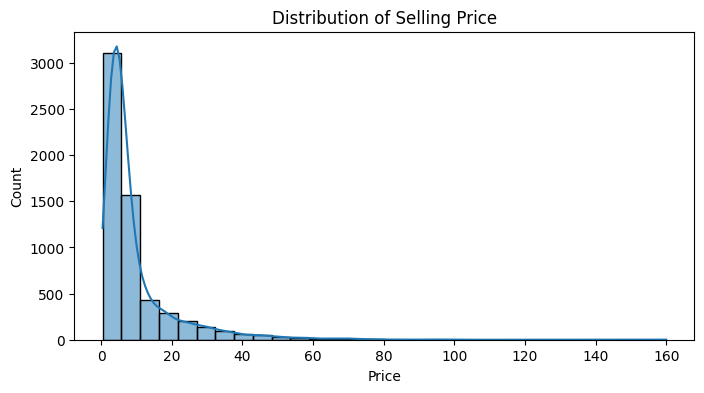

In [150]:
plt.figure(figsize=(8,4))
sns.histplot(df_main['Selling_Price'], bins=30, kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [151]:
print(df_main['Selling_Price'].skew())

3.3352319876668415


In [152]:
df_main['Selling_Price_Log'] = np.log1p(df_main['Selling_Price'])  # log1p handles zero values

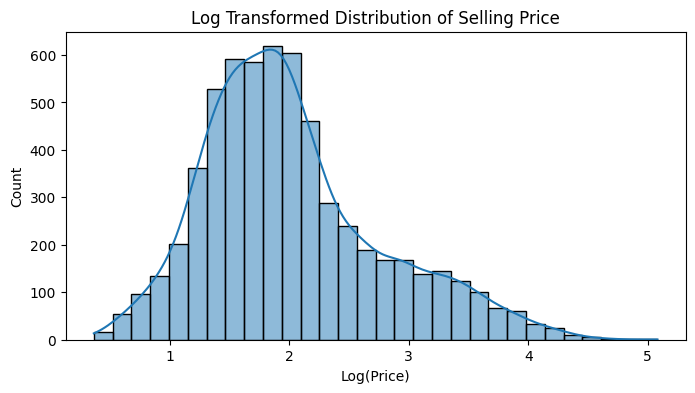

In [153]:
plt.figure(figsize=(8,4))
sns.histplot(df_main['Selling_Price_Log'], bins=30, kde=True)
plt.title("Log Transformed Distribution of Selling Price")
plt.xlabel("Log(Price)")
plt.ylabel("Count")
plt.show()

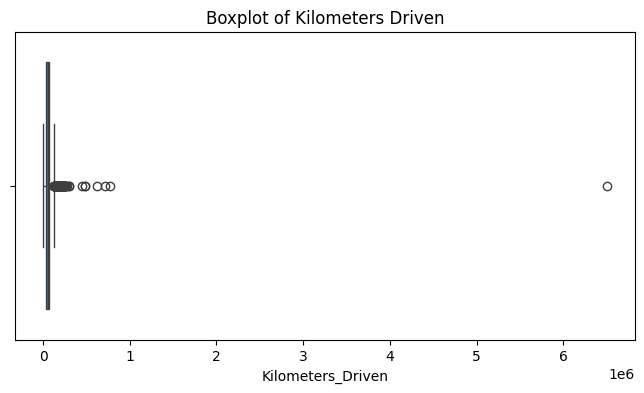

In [154]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df_main['Kilometers_Driven'])
plt.title("Boxplot of Kilometers Driven")
plt.show()

In [155]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_main['Kilometers_Driven'].quantile(0.25)
Q3 = df_main['Kilometers_Driven'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_main = df_main[(df_main['Kilometers_Driven'] >= lower_bound) & (df_main['Kilometers_Driven'] <= upper_bound)]

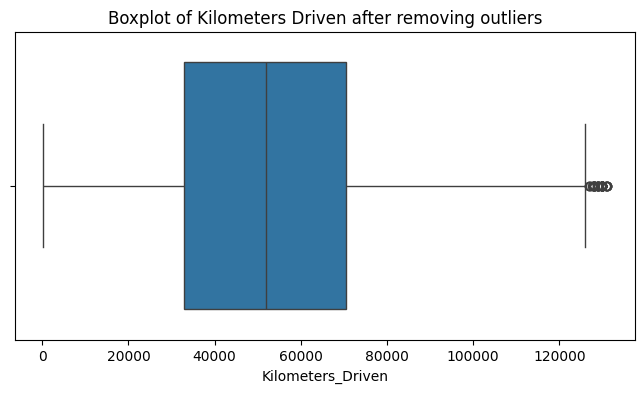

In [156]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df_main['Kilometers_Driven'])
plt.title("Boxplot of Kilometers Driven after removing outliers")
plt.show()

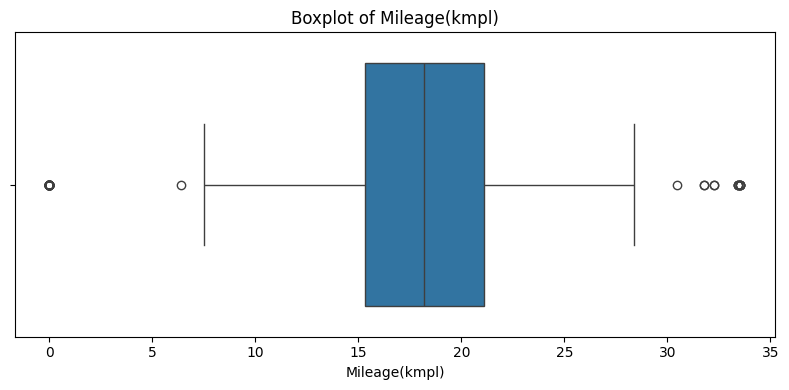

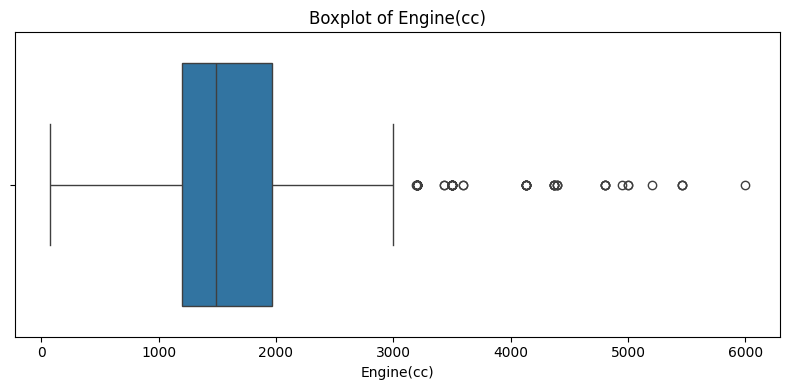

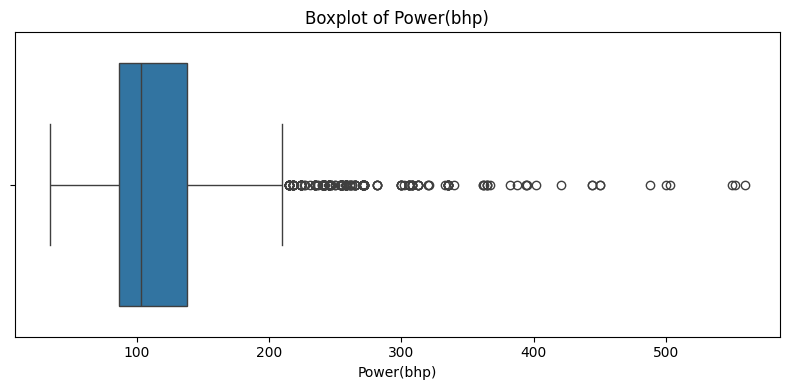

In [157]:
for col in ['Mileage(kmpl)', 'Engine(cc)', 'Power(bhp)']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df_main[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

In [158]:
import numpy as np

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# List of columns to process
columns_with_outliers = ['Kilometers_Driven', 'Mileage(kmpl)', 'Engine(cc)', 'Power(bhp)']

# Apply outlier removal for each column
for col in columns_with_outliers:
    df_main = remove_outliers_iqr(df_main, col)

print("Outliers removed successfully.")

Outliers removed successfully.


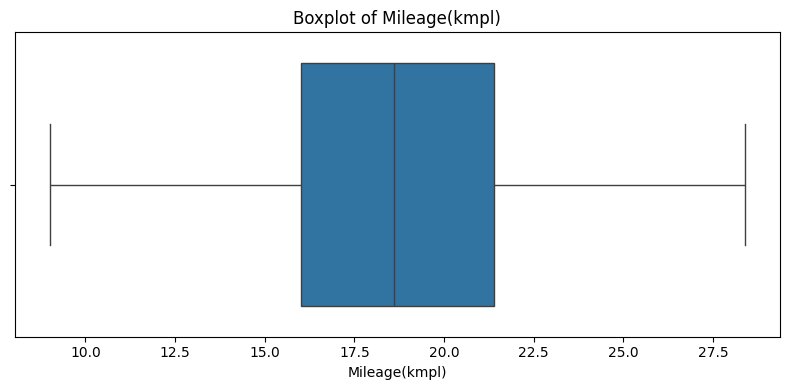

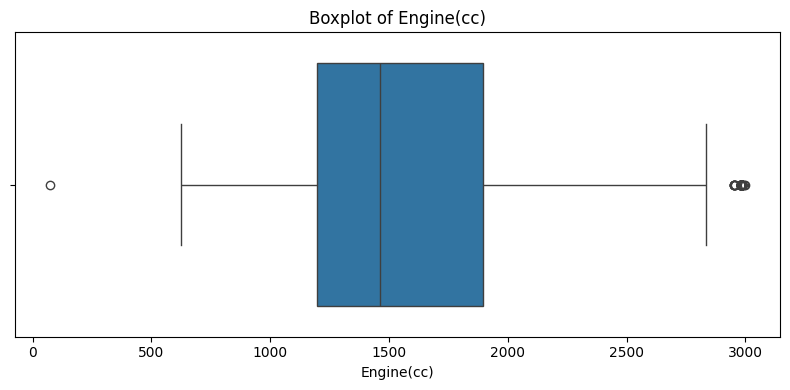

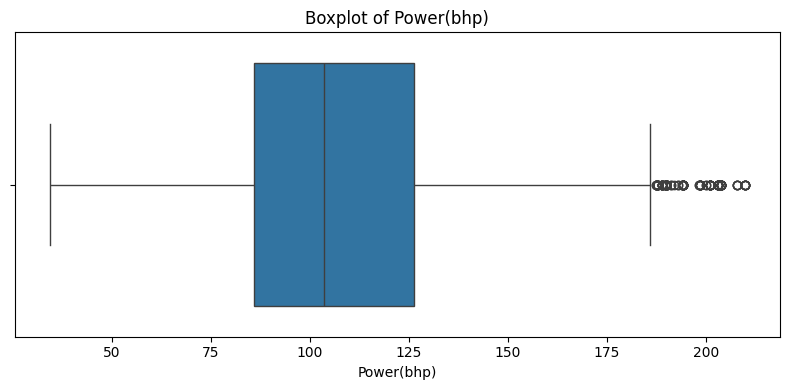

In [159]:
for col in ['Mileage(kmpl)', 'Engine(cc)', 'Power(bhp)']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df_main[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

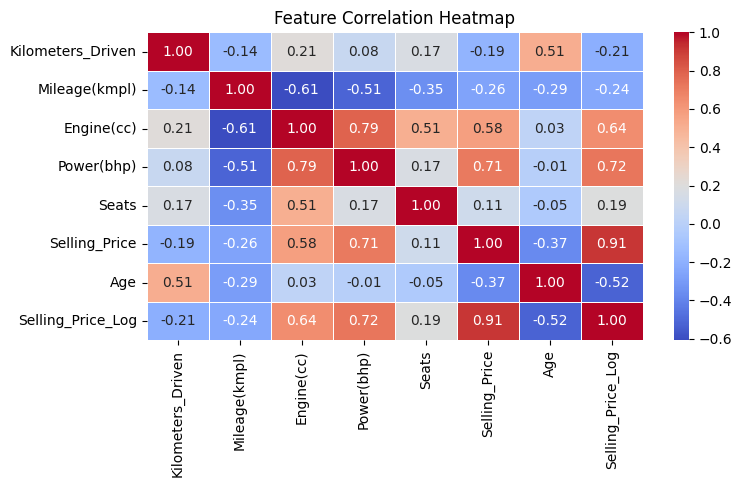

In [160]:
# Select only numerical columns
numeric_df = df_main.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(8,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

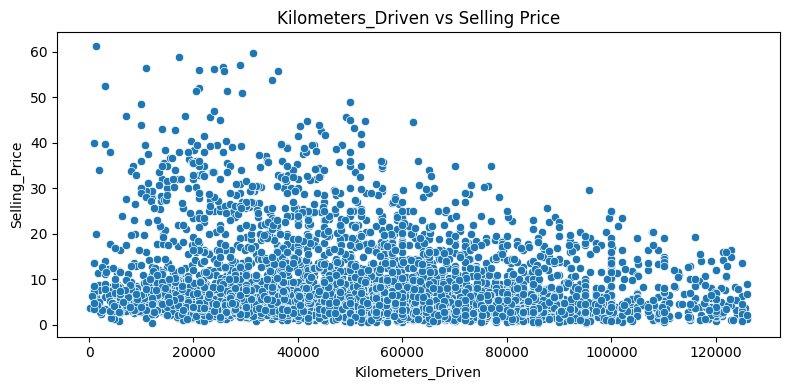

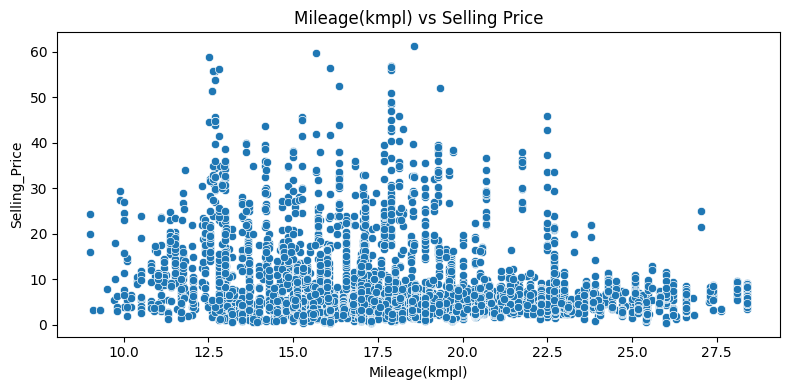

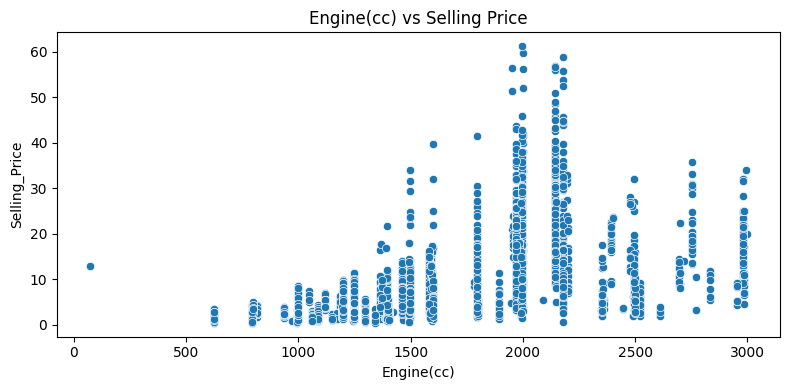

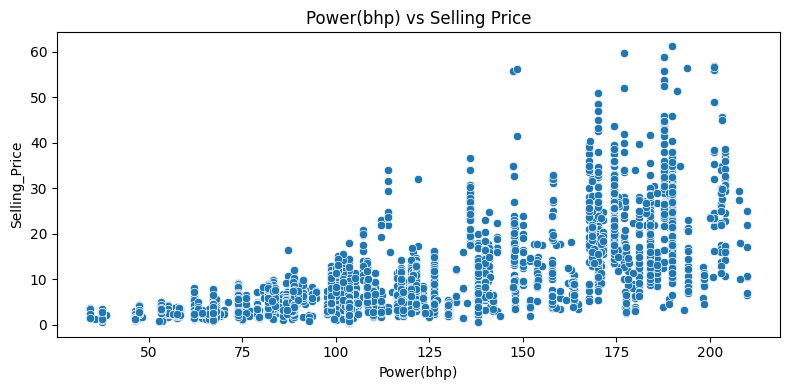

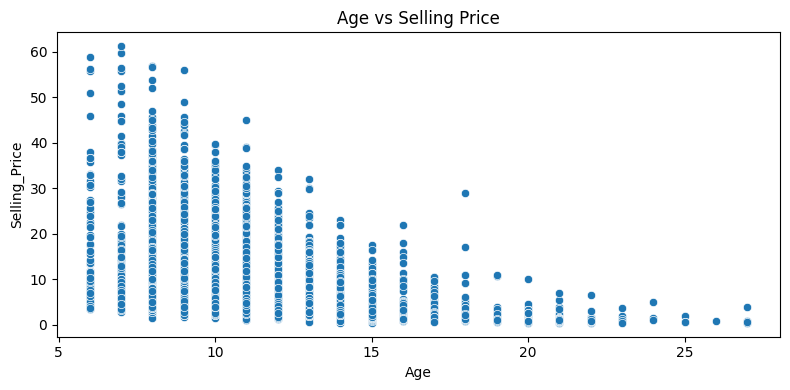

In [161]:
for col in ['Kilometers_Driven', 'Mileage(kmpl)', 'Engine(cc)', 'Power(bhp)', 'Age']:
    plt.figure(figsize=(8,4))
    sns.scatterplot(x=df_main[col], y=df_main['Selling_Price'])
    plt.title(f"{col} vs Selling Price")
    plt.tight_layout()
    plt.show()

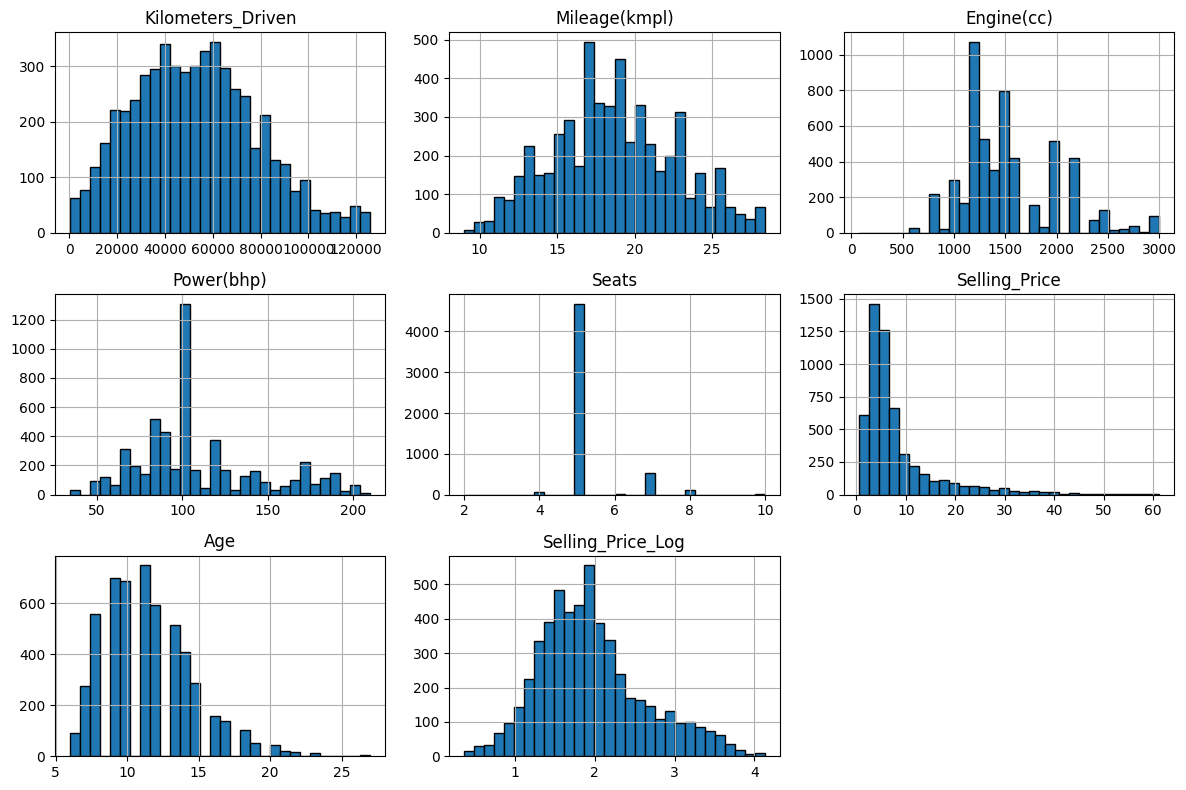

In [162]:
# Assuming df_main is your DataFrame
numerical_cols = df_main.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
df_main[numerical_cols].hist(figsize=(12, 8), bins=30, edgecolor='black')

# Show the plot
plt.tight_layout()
plt.show()

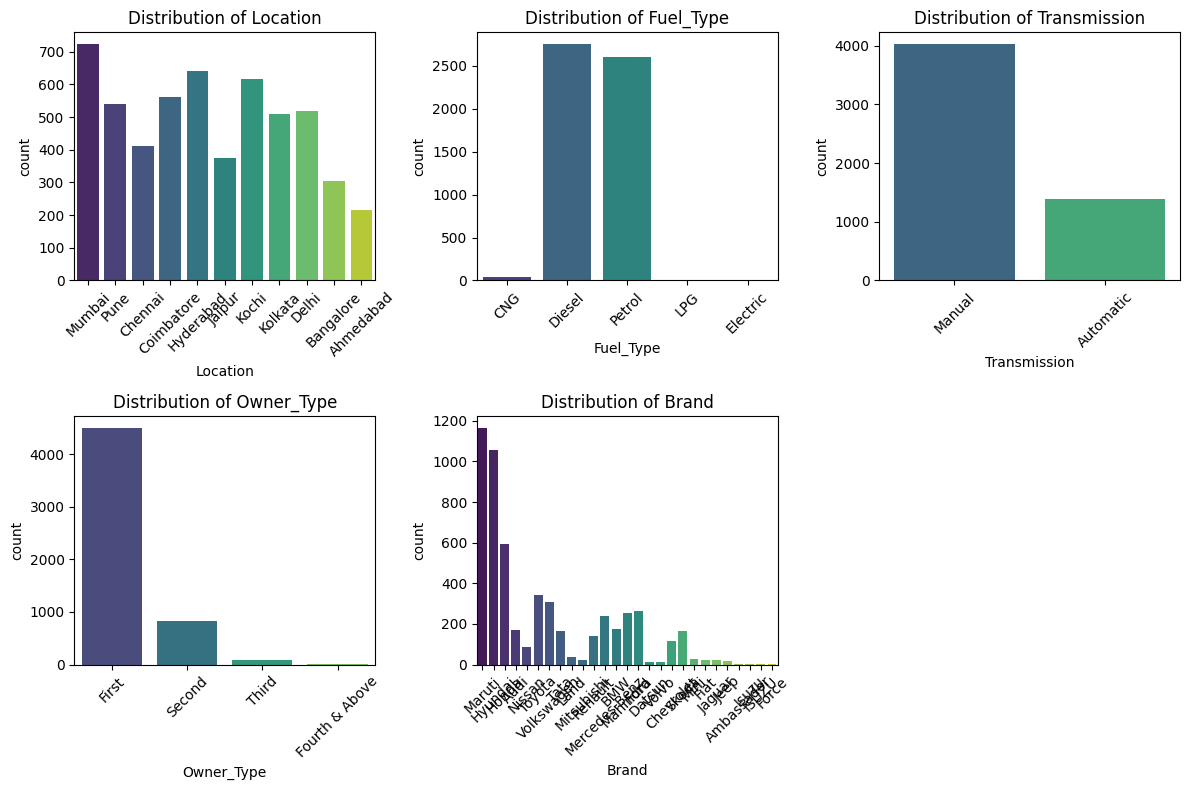

In [163]:
#Selecting categorical columns
categorical_cols = df_main.select_dtypes(include=['object']).columns

# Plot count plots for each categorical column
plt.figure(figsize=(12, 8))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)  # Adjust subplot layout if needed
    sns.countplot(data=df_main, x=col, palette="viridis")
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Step 2: Feature Engineering


 1️⃣ Encoding Categorical Variables

**1.1 Label Encoding for Ordinal Categories**

In [164]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode categorical features
print(df_main['Transmission'].unique())  # Before encoding
df_main['Transmission'] = le.fit_transform(df_main['Transmission'])
print(df_main['Transmission'].unique())  # After encoding

['Manual' 'Automatic']
[1 0]


In [165]:
print(df_main['Owner_Type'].unique())

['First' 'Second' 'Third' 'Fourth & Above']


In [166]:
owner_mapping = {'First': 0, 'Second': 1, 'Third': 2, 'Fourth & Above': 3}
df_main['Owner_Type'] = df_main['Owner_Type'].map(owner_mapping)

In [167]:
print(df_main['Owner_Type'].isnull().sum())  # Should print 0 if mapping is correct

0


**1.2 One-Hot Encoding for Nominal Categories**

In [168]:
# Define threshold (e.g., 1% of total dataset)
threshold = 0.01 * len(df_main)

# Count fuel types
fuel_counts = df_main['Fuel_Type'].value_counts()

# Identify rare fuel types below threshold
rare_fuels = fuel_counts[fuel_counts < threshold].index.tolist()

print(f"Rare fuel types (to be dropped): {rare_fuels}")

# Filter them out
df_main = df_main[~df_main['Fuel_Type'].isin(rare_fuels)]

# One-Hot Encode Fuel_Type
df_main = pd.get_dummies(df_main, columns=['Fuel_Type'], drop_first=True)


Rare fuel types (to be dropped): ['CNG', 'LPG', 'Electric']


#Train-Test split

In [169]:
from sklearn.model_selection import train_test_split

# Load your dataframe (assuming it's already loaded as df)
df = df_main.copy()  # if already defined

# Drop unnecessary columns
df.drop(['Selling_Price_Log'], axis=1, inplace=True, errors='ignore')

# Define features and target
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']

# Split BEFORE any target encoding to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add target temporarily for encoding
train_temp = X_train.copy()
train_temp['Selling_Price'] = y_train

# Target Encoding for Brand
brand_price_map = train_temp.groupby('Brand')['Selling_Price'].mean()
X_train['Brand_encoded'] = X_train['Brand'].map(brand_price_map)
X_test['Brand_encoded'] = X_test['Brand'].map(brand_price_map)

# Target Encoding for Location
location_price_map = train_temp.groupby('Location')['Selling_Price'].mean()
X_train['Location_encoded'] = X_train['Location'].map(location_price_map)
X_test['Location_encoded'] = X_test['Location'].map(location_price_map)

# Drop original Brand and Location columns
X_train.drop(['Brand', 'Location'], axis=1, inplace=True)
X_test.drop(['Brand', 'Location'], axis=1, inplace=True)

# Final Check
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (4287, 11)
Test shape: (1072, 11)


In [170]:
X_train.head()

,Kilometers_Driven,Transmission,Owner_Type,Mileage(kmpl),Engine(cc),Power(bhp),Seats,Age,Fuel_Type_Petrol,Brand_encoded,Location_encoded
1738,91000,0,0,11.40,2953.0,153.86,7.0,13,False,5.709282,8.423024
4444,4500,1,0,18.90,1197.0,81.86,5.0,7,True,5.660224,4.900297
1825,71256,1,0,24.30,1248.0,88.50,5.0,8,False,4.624797,11.870675
136,94385,1,1,19.70,796.0,46.30,5.0,15,True,4.624797,6.529849
3989,70000,1,0,25.83,1498.0,103.60,5.0,9,False,5.709282,6.529849


#Creating Preprocessing Pipeline

In [171]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Features to preprocess
num_features = ['Kilometers_Driven', 'Mileage(kmpl)', 'Engine(cc)', 'Power(bhp)', 'Seats', 'Age']

# Create a pipeline for numerical preprocessing
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Fit and transform on training data
X_train[num_features] = num_pipeline.fit_transform(X_train[num_features])

# Only transform on test data
X_test[num_features] = num_pipeline.transform(X_test[num_features])

In [172]:
print(X_train.shape)
print(X_test.shape)

(4287, 11)
(1072, 11)


### Model Creation/Evaluation

In [173]:
# Define candidate models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Container to hold evaluation results
results = []

# Train, predict, and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)             # Train model
    y_pred = model.predict(X_test)          # Predict on test data

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append([name, mae, mse, rmse, r2])

# Create a DataFrame to display results
results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R² Score"])
results_df = results_df.sort_values(by="R² Score", ascending=False)

# Show performance comparison
print("\n✅ Model Performance Comparison:\n")
print(results_df)

# Select and use the best model
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]
print(f"\n🏆 Best Model Selected: {best_model_name}")

# Predict using best model (no need to reverse log transform)
y_pred = best_model.predict(X_test)


✅ Model Performance Comparison:

               Model       MAE        MSE      RMSE  R² Score
4            XGBoost  0.866683   2.477852  1.574119  0.961639
2      Random Forest  1.002828   3.198224  1.788358  0.950487
3  Gradient Boosting  1.142140   3.376604  1.837554  0.947726
1      Decision Tree  1.334902   6.001221  2.449739  0.907093
0  Linear Regression  2.296240  13.326192  3.650506  0.793692

🏆 Best Model Selected: XGBoost


#Xgboost Fine tuning

In [174]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the base model
xgb = XGBRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',         # since we're doing regression
    cv=3,                 # 3-fold cross-validation
    verbose=2,
    n_jobs=-1             # Use all available cores
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best estimator and score
print("Best R² Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

# Use the best model
best_xgb_model = grid_search.best_estimator_

y_pred = best_xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n🔍 Tuned XGBoost Performance:")
print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best R² Score: 0.9447280796695132
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}

🔍 Tuned XGBoost Performance:
MAE: 0.8365, MSE: 2.0644, RMSE: 1.4368, R² Score: 0.9680


#Visualize Predictions vs Actuals

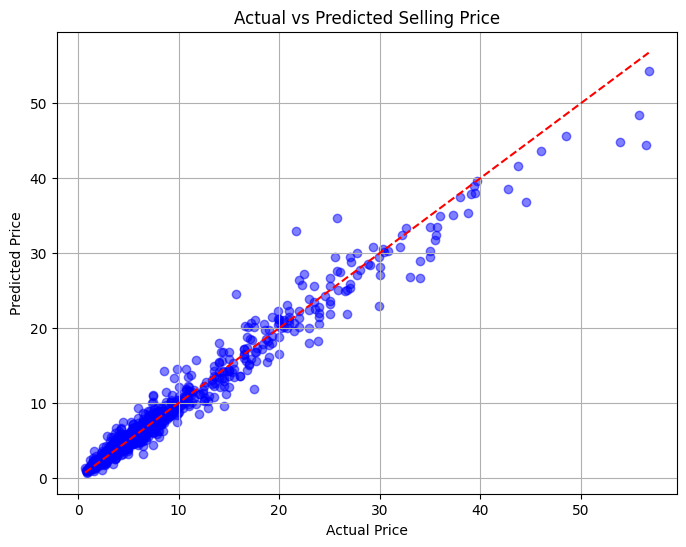

In [175]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Selling Price")
plt.grid(True)
plt.show()


In [26]:
import joblib

# Save the best model
joblib.dump(best_xgb_model, 'best_model.pkl')
print("📦 Best model saved as 'best_model.pkl'")

NameError: name 'best_xgb_model' is not defined